## Evaluation of geometric modelling for 

1. TECDEM: data\evaluation\TECDEM
2. SimStadt: data\evaluation\SimStadt
3. CityEnergyAnalyst: data\evaluation\cea

In [1]:
import pandas as pd
import os
import geopandas as gpd


In [2]:
# get data for SimStadt
files = []
df = pd.DataFrame()
for file in os.listdir(r'data\evaluation\SimStadt'):
    if file.endswith('.csv'):
        files.append(os.path.join(r'data\evaluation\SimStadt', file))


skiprows = list(range(0, 19)) + [20]

# read all files into a pandas dataframe
df_SimStadt = pd.concat((pd.read_csv(file,  skiprows=skiprows,
                                      sep=';', decimal=",") for file in files), ignore_index=True)

df_SimStadt.head()

,GMLId,ParentGMLId,Latitude,Longitude,X-coordinate,Y-coordinate,LOD,Year of construction,Year of refurbishment,Refurbishment Variant,...,March Heating Demand,April Heating Demand,May Heating Demand,June Heating Demand,July Heating Demand,August Heating Demand,September Heating Demand,October Heating Demand,November Heating Demand,December Heating Demand
0,DEBE3DeVro4Xquwj,DEBE3D04YY50000Pqq,52.52602,13.29950,384637.20,5820905.42,LOD2,1905,NaN,Original,...,20040,6138,885,9,0,0,1753,12966,27121,38549
1,DEBE3DqljAotc5Mc,DEBE3D04YY50000JNV,52.52465,13.30034,384690.78,5820751.39,LOD2,1905,NaN,Original,...,4968,812,45,0,0,0,124,3356,9028,13768
2,DEBE3DSlz3JV8rPT,DEBE3D04YY50000Ncz,52.52392,13.30058,384705.24,5820669.45,LOD2,1905,NaN,Original,...,7751,2459,401,2,0,0,538,4810,11046,16462
3,DEBE3DNvy8Mr4hpJ,DEBE3D04YY500006oB,52.52250,13.30168,384776.17,5820510.11,LOD2,1905,NaN,Original,...,9051,1895,102,0,0,0,390,5742,13052,18632
4,DEBE3DOgQzlAY1Lv,DEBE3D04YY50000G12,52.52498,13.29933,384623.02,5820789.65,LOD2,1905,NaN,Original,...,3464,1082,169,2,0,0,277,2190,4654,6706


In [3]:
# get data for cea 
df_SimStadt.columns

Index(['GMLId', 'ParentGMLId', 'Latitude', 'Longitude', 'X-coordinate',
       'Y-coordinate', 'LOD', 'Year of construction', 'Year of refurbishment',
       'Refurbishment Variant', 'ALKIS code', 'PrimaryUsageZoneType',
       'PrimaryUsageZoneArea', 'SecondaryUsageZoneType',
       'SecondaryUsageZoneArea', 'BuildingType', 'Footprint area',
       'Total wall thermal area above ground',
       'Total wall thermal area below ground', 'Total outwall area',
       'Total sharedwall area', 'Total roof area', 'Gross volume',
       'Is Gross volume approximated?', 'Heated volume', 'Ridge/mean Height',
       'Eaves/mean Height', 'Storey number', 'Average Storey Height',
       'Number of households', 'Number of occupants', 'Attic Heating',
       'Basement Heating', 'Basement ceiling height above ground',
       'Surface area to volume ratio', 'Heated area', 'Mean Uvalue',
       'Specific domestic hot water demand', 'Specific space heating demand',
       'Total Yearly Heat+DHW demand', 

<Axes: >

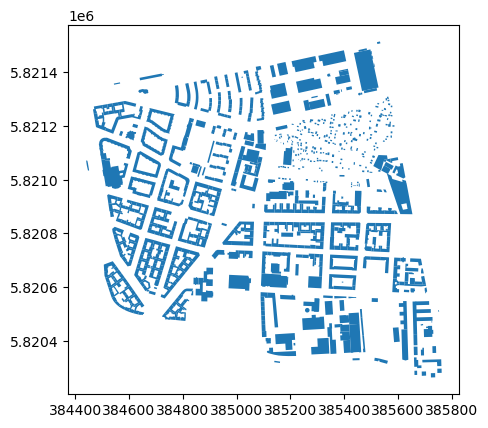

In [4]:
# get data for cea 
# Load Building level data and shape file
CEA_shape_path = os.path.join('data', 'evaluation', 'cea', 'building-geometry' ,'zone.shp')
CEA_shape = gpd.read_file(CEA_shape_path)
CEA_shape.plot()

In [5]:
CEA_shape.head()
# load building level data from TEDEM

,Name,height_ag,floors_ag,height_bg,floors_bg,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country,geometry
0,B1000,2.0,2,3.0,1,NaN,school,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((384874.043 5820594.084, 384873.807 5..."
1,B1001,3.0,3,3.0,1,NaN,service,OSM - as it is,10,Lise-Meitner-Straße,10589,NaN,NaN,Berlin,DE,"POLYGON ((385147.715 5821181.978, 385145.006 5..."
2,B1002,1.0,1,3.0,1,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385315.603 5820595.263, 385265.770 5..."
3,B1003,1.0,1,3.0,1,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385231.453 5820685.213, 385230.993 5..."
4,B1004,6.0,6,3.0,1,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385092.809 5820650.440, 385096.097 5..."


In [6]:
# load building level data from TEDEM
tecdem_data = pd.read_csv(r'data\evaluation\TECDEM\Mierendorff_GML_updated.csv', index_col=0)
tecdem_data.head()



,gml_id,dg_id,address,building_type_gml,year_of_construction,renovation_status,floor_area,height,storeys_above_ground,average_floor_height
5,DEBE3D04YY50000BlO,0,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Mi...",31001_1010,1900.0,NaN,795.406738,23.220,NaN,2.8
8,DEBE3D04YY50000Rac,1,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Ka...",31001_1010,1905.0,NaN,724.393066,24.421,NaN,2.8
10,DEBE3D04YY50000DCT,2,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2463,1905.0,NaN,23.834473,2.867,NaN,2.8
12,DEBE3D04YY50000Lev,3,"Germany,Berlin,Charlottenburg-Wilmersdorf,Tege...",31001_1010,1905.0,NaN,196.167480,22.963,NaN,2.8
14,DEBE3D04YY500002JB,4,"Germany,Berlin,Charlottenburg-Wilmersdorf,Mier...",31001_1010,1905.0,NaN,501.797363,24.448,NaN,2.8


<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x1ea94e92980>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x1ea9d0e44c0>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x1eab2815240>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x1eab28abe00>


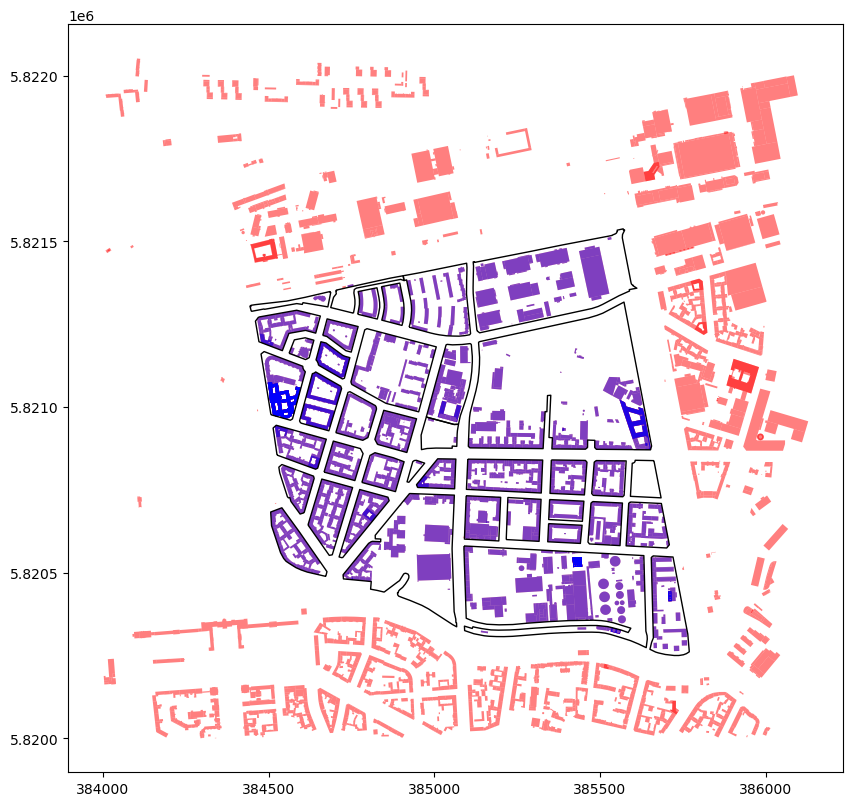

In [22]:
# Map GML ID to CEA ID 
import lxml.etree as ET
import shapely.geometry as geom
import matplotlib.pyplot as plt

ns = {
    'gml': 'http://www.opengis.net/gml',
    'bldg': 'http://www.opengis.net/citygml/building/2.0',
     'bldg' :"http://www.opengis.net/citygml/building/1.0"
}
# Code taken from https://github.com/TUB-DVG/TECDEM/blob/main/experiments/92a_ModelUpdatedGML.ipynb 

# ToDo - Write function to get building and building part IDs
gml_files = [os.path.join('data', 'examples', 'gml_data', file) for file in os.listdir(r'data\examples\gml_data') if file.endswith('.xml')]
# Extract building geometries along with their IDs

# Load shapefile
shapefile_path = os.path.join('data', 'examples', 'block_shape', '00_block_shape.shp')
blocks_gdf = gpd.read_file(shapefile_path)

# Get the relevant blocks at the innner mierendorff Insel
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
blocks_gdf['blknr'] = blocks_gdf["blknr"].astype(str)
blocks_gdf = blocks_gdf[~blocks_gdf["blknr"].isin(outer_mierendorff)]

def extract_ground_surface_polygons_with_ids(gml_root):
    buildings = []

    # Iterate over each building
    for bldg in gml_root.findall('.//{*}Building', ns):
        bldg_id = bldg.get('{http://www.opengis.net/gml}id')
        #print(bldg)

        # Find all GroundSurface elements within the boundedBy elements
        for ground_surface in bldg.findall('.//{*}GroundSurface', ns):
            pos_list_elements = ground_surface.findall('.//gml:posList', ns)
            if pos_list_elements is not None:
                for geom_elem in pos_list_elements:
                    pos_list = geom_elem.text.split()
                    if len(pos_list) % 3 != 0:
                        print(f"Warning: posList does not contain triplets of coordinates: {pos_list}")
                        continue
                    try:
                        # Convert coordinates to a 2D polygon (ignoring z-values)
                        exterior_coords = []
                        interior_coords = []
                        
                        # Find exterior coordinates
                        exterior = ground_surface.find('.//gml:exterior//gml:posList', ns)
                        if exterior is not None:
                            exterior_pos_list = exterior.text.split()
                            exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                        
                        # Find interior coordinates
                        interiors = ground_surface.findall('.//gml:interior//gml:posList', ns)
                        for interior in interiors:
                            interior_pos_list = interior.text.split()
                            interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                        
                        # Create polygon with exterior and interior (holes)
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")
            else:
                # Alternatively, check for 'Polygon' elements under GroundSurface
                for poly in ground_surface.findall('.//gml:Polygon', ns):
                    exterior_coords = []
                    interior_coords = []
                    
                    # Find exterior coordinates
                    exterior = poly.find('.//gml:exterior//gml:posList', ns)
                    if exterior is not None:
                        exterior_pos_list = exterior.text.split()
                        if len(exterior_pos_list) % 3 != 0:
                            print(f"Warning: exterior posList does not contain triplets of coordinates: {exterior_pos_list}")
                            continue
                        exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                    
                    # Find interior coordinates
                    interiors = poly.findall('.//gml:interior//gml:posList', ns)
                    for interior in interiors:
                        interior_pos_list = interior.text.split()
                        if len(interior_pos_list) % 3 != 0:
                            print(f"Warning: interior posList does not contain triplets of coordinates: {interior_pos_list}")
                            continue
                        interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                    
                    try:
                        # Create polygon with exterior and interior (holes)
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")

    return buildings



# Now, update the code to use the modified function
list_buildings = []
for gml_file in gml_files:
    tree = ET.parse(gml_file)
    root = tree.getroot()
    # Use the modified function that extracts only ground surfaces
    print(root)
    buildings = extract_ground_surface_polygons_with_ids(root)
    list_buildings.extend(buildings)  # Use extend to flatten the list

# Check if we have extracted any buildings
if not list_buildings:
    print("No buildings were extracted from the GML files.")
else:
    # Convert to GeoDataFrame
    buildings_gdf = gpd.GeoDataFrame(list_buildings, crs=blocks_gdf.crs)
    # Select columns using a list instead of a tuple
    columns_to_keep = ['blknr', 'plr', 'blktypname', 'ewk', 'area', 'geometry']
    blocks_gdf = blocks_gdf[columns_to_keep]
    # Check if buildings are within blocks
    buildings_gdf = buildings_gdf.reset_index(drop=True)
    blocks_gdf = blocks_gdf.reset_index(drop=True)
    within_blocks = gpd.sjoin(buildings_gdf, blocks_gdf, how='inner', predicate='intersects')


    # Optional: Plotting the results for visual inspection
    fig, ax = plt.subplots(figsize=(10, 10))
    blocks_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    buildings_gdf.plot(ax=ax, color='red', alpha=0.5)
    within_blocks.plot(ax=ax, color='blue', alpha=0.5)
    plt.show()

In [23]:
within_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1641 entries, 5 to 3396
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     1641 non-null   geometry
 1   gml_id       1641 non-null   object  
 2   index_right  1641 non-null   int64   
 3   blknr        1641 non-null   object  
 4   plr          1641 non-null   object  
 5   blktypname   1641 non-null   object  
 6   ewk          1641 non-null   object  
 7   area         1641 non-null   float64 
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 115.4+ KB


In [24]:
# spatial merge of within_blocks with data from cea

within_blocks.to_crs(CEA_shape.crs)
# Check and rename columns if necessary
if 'index_left' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_left': 'index_left_'})
if 'index_right' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_right': 'index_right_'})

"""if 'index_left' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_left': 'index_left_'})
if 'index_right' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_right': 'index_right_'})
"""
# Now perform the spatial join
within_blocks = within_blocks.to_crs(CEA_shape.crs)
merged_gdf = gpd.sjoin(within_blocks, CEA_shape, how='inner', predicate='intersects')
merged_gdf.drop_duplicates()

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"POLYGON ((384982.867 5820756.296, 384983.381 5...",DEBE3D04YY500002HZ,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"POLYGON ((384988.955 5820786.719, 384983.965 5...",DEBE3D04YY50000PO8,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"POLYGON ((384976.272 5820790.551, 384970.271 5...",DEBE3D04YY50000PO8,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,315,B1315,...,NaN,yes,OSM - as it is,7A,Gaußstraße,10589,NaN,NaN,Berlin,DE
3306,"POLYGON ((385382.860 5821391.903, 385380.416 5...",DEBE3D04AL54V00006,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,"POLYGON ((385384.255 5821385.441, 385384.198 5...",DEBE3D04AL54V00003,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,459,B1459,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
list(merged_gdf[merged_gdf["gml_id"] == "DEBE3D04YY50000BlO"]["Name"])

['B1116', 'B1116', 'B1115', 'B1115']

<Axes: >

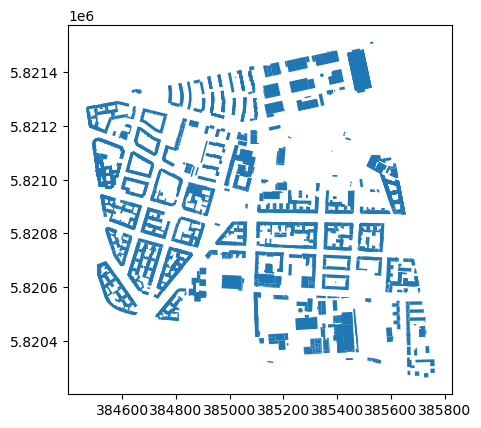

In [26]:
merged_gdf.plot()


<Axes: >

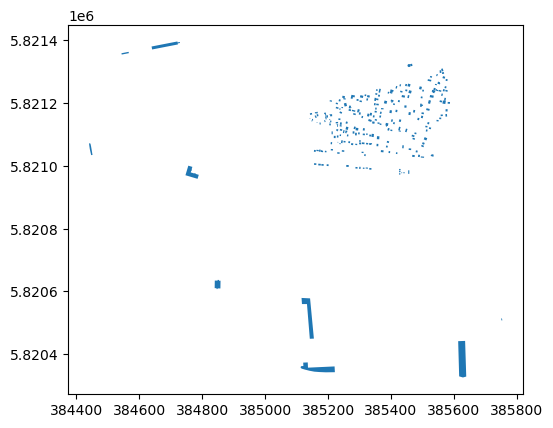

In [27]:
# Buildings only in cea
CEA_shape[~CEA_shape["Name"].isin(merged_gdf["Name"])].plot()


<Axes: >

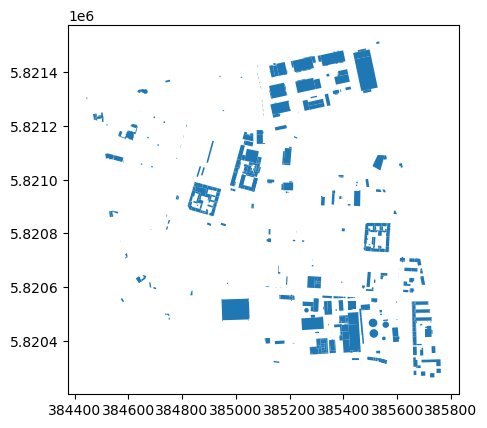

In [28]:
# Buildings not in SimStadt
SimStadt_buildings = list(df_SimStadt["GMLId"].unique())
SimStadt_buildings.extend(list(df_SimStadt["ParentGMLId"].unique()))
SimStadt_buildings.extend(list(df_SimStadt))

# Building that are NOT in Simstadt 
within_blocks[~within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

<Axes: >

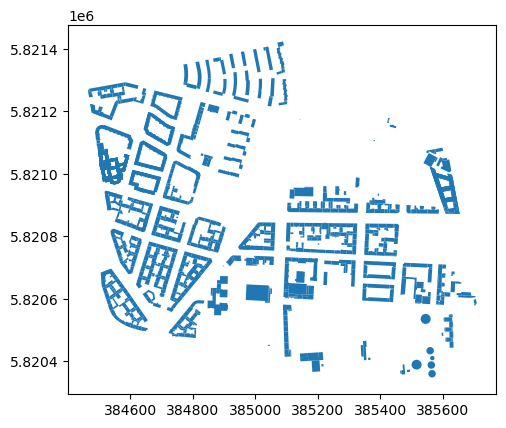

In [29]:
# Building that are Simstadt 
within_blocks[within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

In [30]:
# Figure out reasons why the buildings are not in Simstadt results
not_in_Simstadt = [x for x in within_blocks["gml_id"] if x not in SimStadt_buildings]

import re
import os

# Function to search for a GML ID in a log file
def search_gml_id_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return match.group(0)
    return None

# Directory containing the log files
log_dir = 'data/evaluation/SimStadt'

# Dictionary to store results
results = {}


# Function to search for a GML ID and its exclusion reason in a log file
def search_gml_id_and_reason_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the exclusion reason
        reason_match = re.search(r'Excluded \d+ buildings? from processing \(reason: (.+?)\)', content)
        reason = reason_match.group(1) if reason_match else "Unknown reason"
        
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return (reason, match.group(0))
    return None

# Update the loop to use the new function
for gml_id in not_in_Simstadt:
    results[gml_id] = []
    
    for filename in os.listdir(log_dir):
        if filename.endswith('.log'):
            file_path = os.path.join(log_dir, filename)
            result = search_gml_id_and_reason_in_log(file_path, gml_id)
            if result:
                results[gml_id].append((filename, *result))

# Print the updated results
for gml_id, matches in results.items():
    print(f"GML ID: {gml_id}")
    if matches:
        for filename, reason, match in matches:
            print(f"  Found in {filename}:")
            print(f"    Reason: {reason}")
            print(f"    Match: {match}")
    else:
        print("  Not found in any log file")
    print()



GML ID: DEBE3D04YY50000LDg
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000LDg;139,70;58,48;384698,22050;5820596,12550;-

GML ID: DEBE3D04YY50000GQP
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000GQP;235,86;94,77;384681,58200;5820607,90300;-

GML ID: DEBE3D04YY500005mD
  Not found in any log file

GML ID: DEBE3D04YY50000R2f
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000R2f;175,30;58,42;384743,96700;5820819,54450;-

GML ID: DEBE3D04YY50002bU7
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50002bU7;0,79;5,90;384684,21850;5820813,98750;-

GML ID: DEBE3D04YY50000JjD
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000JjD;161,80;73,32;384750,96650;5820

In [31]:
merged_gdf[merged_gdf["gml_id"].isin(tecdem_data["gml_id"])]

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"POLYGON ((384982.867 5820756.296, 384983.381 5...",DEBE3D04YY500002HZ,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,315,B1315,...,NaN,yes,OSM - as it is,7A,Gaußstraße,10589,NaN,NaN,Berlin,DE
3306,"POLYGON ((385382.860 5821391.903, 385380.416 5...",DEBE3D04AL54V00006,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,"POLYGON ((385384.255 5821385.441, 385384.198 5...",DEBE3D04AL54V00003,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,459,B1459,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN


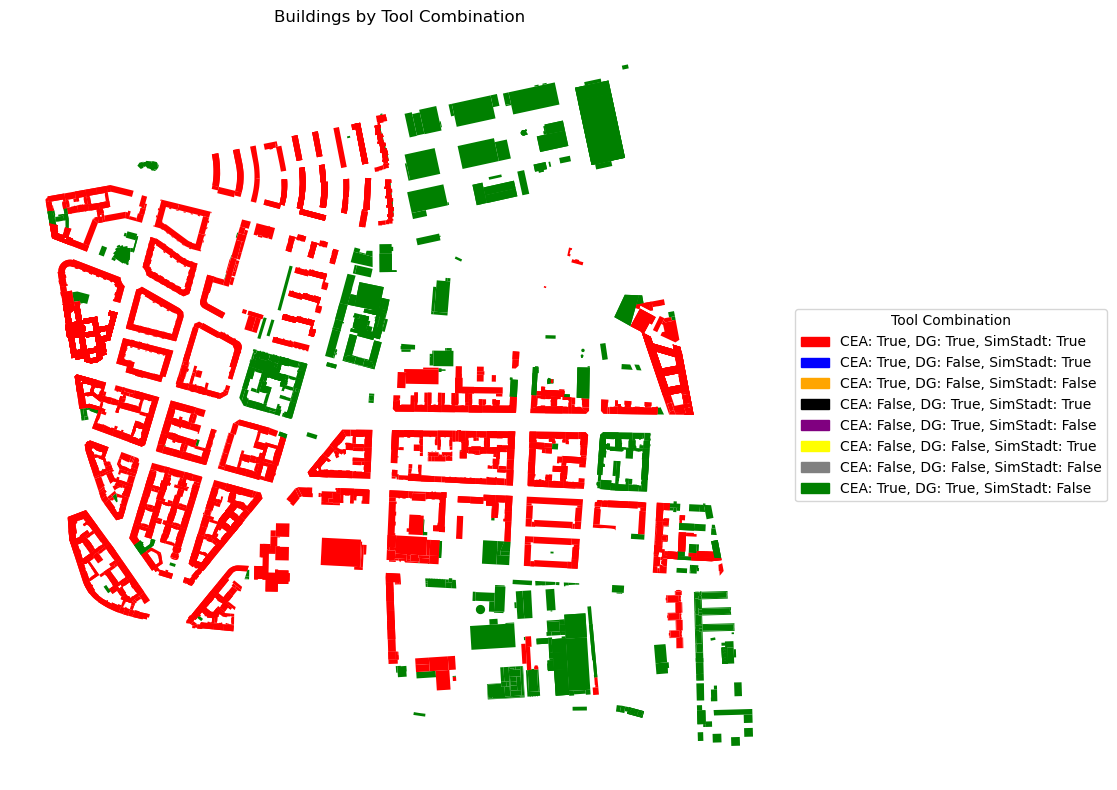

In [32]:
# Create boolean columns for each tool
merged_gdf["CEA"] = merged_gdf["Name"].isin(CEA_shape["Name"].tolist())
merged_gdf["districtgenerator"] = merged_gdf["gml_id"].isin(tecdem_data["gml_id"].tolist())
merged_gdf["SimStadt"] = merged_gdf["gml_id"].isin(SimStadt_buildings)

# Define color mapping for all possible combinations with more varied colors
color_map = {
    (True, True, True): 'red',
    
    (True, False, True): 'blue',
    (True, False, False): 'orange',
    (False, True, True): 'black',
    (False, True, False): 'purple',
    (False, False, True): 'yellow',
    (False, False, False): 'gray',
    (True, True, False): 'green',
}

# Create a new column with colors based on the combination
merged_gdf['color'] = merged_gdf.apply(lambda row: color_map[(row['CEA'], row['districtgenerator'], row['SimStadt'])], axis=1)

# Plot the GeoDataFrame using a colormap for the 'color' column
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting with color categories
merged_gdf.plot(color=merged_gdf['color'], ax=ax, legend=True)

# Customize the legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
labels = [f"CEA: {c[0]}, DG: {c[1]}, SimStadt: {c[2]}" for c in color_map.keys()]
plt.legend(handles, labels, title='Tool Combination', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Buildings by Tool Combination')
plt.axis('off')
plt.tight_layout()
plt.show()


In [33]:
# Now compare the size of the building areas 
# Start with the sum of all buildings
sum_cea = CEA_shape[CEA_shape['Name'].isin(merged_gdf['Name'])]["geometry"].area.sum()
sum_districtgenerator = tecdem_data["floor_area"].sum()
sum_SimstStadt = df_SimStadt["Footprint area"].sum()




In [34]:
sum_districtgenerator_SimStadt = tecdem_data[tecdem_data["gml_id"].isin(SimStadt_buildings)]["floor_area"].sum()
print("Sum of buildings in districtgenerator, that are differently modelled in SimStadt:",
      sum_districtgenerator_SimStadt)

Sum of buildings in districtgenerator, that are differently modelled in SimStadt: 265239.57275390625


In [35]:
print("Sum of heated area in Simstadt:", df_SimStadt['Heated area'].sum())

Sum of heated area in Simstadt: 1152177.5


In [36]:
# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
df_SimStadt.groupby(["ParentGMLId"])

In [37]:
# Now compare the size of the building areas 
# Start with the sum of all buildings
sum_cea = CEA_shape[CEA_shape['Name'].isin(merged_gdf['Name'])]["geometry"].area.sum()
sum_districtgenerator = tecdem_data["floor_area"].sum()
sum_SimstStadt = df_SimStadt["Footprint area"].sum()



sum_districtgenerator_SimStadt = tecdem_data[tecdem_data["gml_id"].isin(SimStadt_buildings)]["floor_area"].sum()
print("Sum of buildings in districtgenerator, that are differently modelled in SimStadt:",
      sum_districtgenerator_SimStadt)



print("Sum of heated area in Simstadt:", df_SimStadt['Heated area'].sum())

# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
area_df["gml_id"] = tecdem_data["gml_id"]
area_df["districtgenerator_area"] = tecdem_data["floor_area"].values
# Step 1: Group df_SimStadt by 'ParentGMLId' and sum the 'Footprint area' for each group
grouped_sum = df_SimStadt.groupby("ParentGMLId")["Footprint area"].sum()
# Step 2: Get 'Footprint area' for each GMLId directly from df_SimStadt
direct_sum = df_SimStadt.set_index("GMLId")["Footprint area"]
# Step 3: Combine the grouped sum and direct sum, aligning them by 'GMLId'
total_sum = grouped_sum.add(direct_sum, fill_value=0)
# Step 4: Reindex the combined result to match the 'gml_id' in area_df
area_df["simstadt_area"] = total_sum.reindex(area_df["gml_id"]).fillna(0).values



# Ensure both columns have the same length
assert len(area_df["districtgenerator_area"]) == len(area_df["simstadt_area"])



# Figure max difference
area_df["difference"] = abs(area_df["districtgenerator_area"] - area_df["simstadt_area"])


area_df.sort_values(["difference"], ascending=False)




area_df["factor"] = area_df.apply(lambda row: row["districtgenerator_area"] / row["simstadt_area"] if row["simstadt_area"] != 0.0 else float('nan'), axis=1)
# Remove rows with NaN factors
area_df = area_df.dropna(subset=['factor'])
# Sort the DataFrame by the 'factor' column in ascending order
area_df_sorted = area_df.sort_values('factor', ascending=True)


Sum of buildings in districtgenerator, that are differently modelled in SimStadt: 265239.57275390625
Sum of heated area in Simstadt: 1152177.5


In [38]:
area_df_sorted

,gml_id,districtgenerator_area,simstadt_area,difference,factor
123,DEBE3D04YY50000D8T,3.964844,4.0,0.035156,0.991211
202,DEBE3D04YY50000HI4,8.356445,8.4,0.043555,0.994815
104,DEBE3D04YY500005Xu,12.755615,12.8,0.044385,0.996532
172,DEBE3D04YY50000HmC,13.271973,13.3,0.028027,0.997893
155,DEBE3D04YY500009Fz,23.058594,23.1,0.041406,0.998208
...,...,...,...,...,...
411,DEBE3D04YY500009pj,5939.262939,3006.1,2933.162939,1.975737
234,DEBE3D04YY50000Ffk,385.906982,194.9,191.006982,1.980026
223,DEBE3D04YY500003fU,6629.514404,3341.2,3288.314404,1.984172
123,DEBE3D04YY5000058C,1193.725098,599.8,593.925098,1.990205
